**Customer Segmentation Analysis:**

This notebook aims to perform customer segmentation using Python. The objective is to group customers based on their behavior and characteristics in order to better understand customer patterns, improve marketing strategies, and enhance customer satisfaction.

Key steps included in this analysis:

1. Data loading and exploration

2. Data cleaning and preprocessing

3. Feature selection and engineering

4. Applying clustering algorithms 

5. Evaluating and interpreting clusters

6. Drawing actionable insights for business strategies

Tools and libraries used:

Python (pandas, numpy, scikit-learn, matplotlib, seaborn)

In [3]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
# from sklearn.cluster import AgglomerativeClustering

In [4]:
# 1. Import the dataset and explore it

data = pd.read_csv("Mall_Customers.csv")
print(data.head(3))
print("-" * 75)
print(data.shape)
print("-"*75)
print(data.info())
print("-" * 75)
print(data.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
---------------------------------------------------------------------------
(200, 5)
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
--------------------------------

In [5]:
# Choosing the features for clustering 

X = data.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

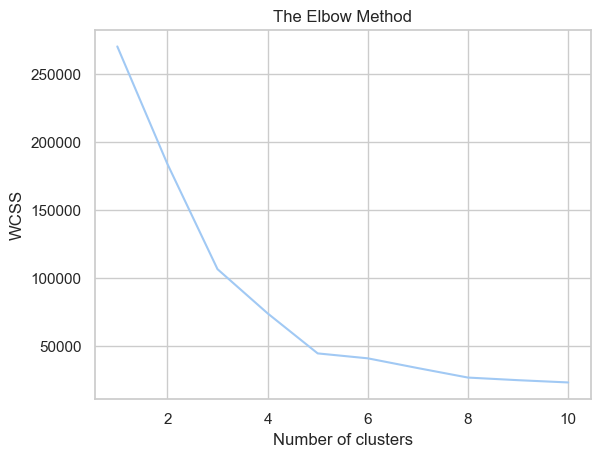

In [6]:
#  Elbow Method to find WCSS value for different values of K

wcss = []

for i in range(1, 11):
    kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.set_theme(style="whitegrid", palette="pastel", context="notebook")
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

**The Optimum Numbers of Clusters would be five as the above graph suggests.**

In [7]:
# Training the K-Means model on the dataset

kmeans = KMeans (n_clusters = 5, init = 'k-means++', random_state= 0)

# return a label for each data point based on their cluster

Y = kmeans.fit_predict(X)
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


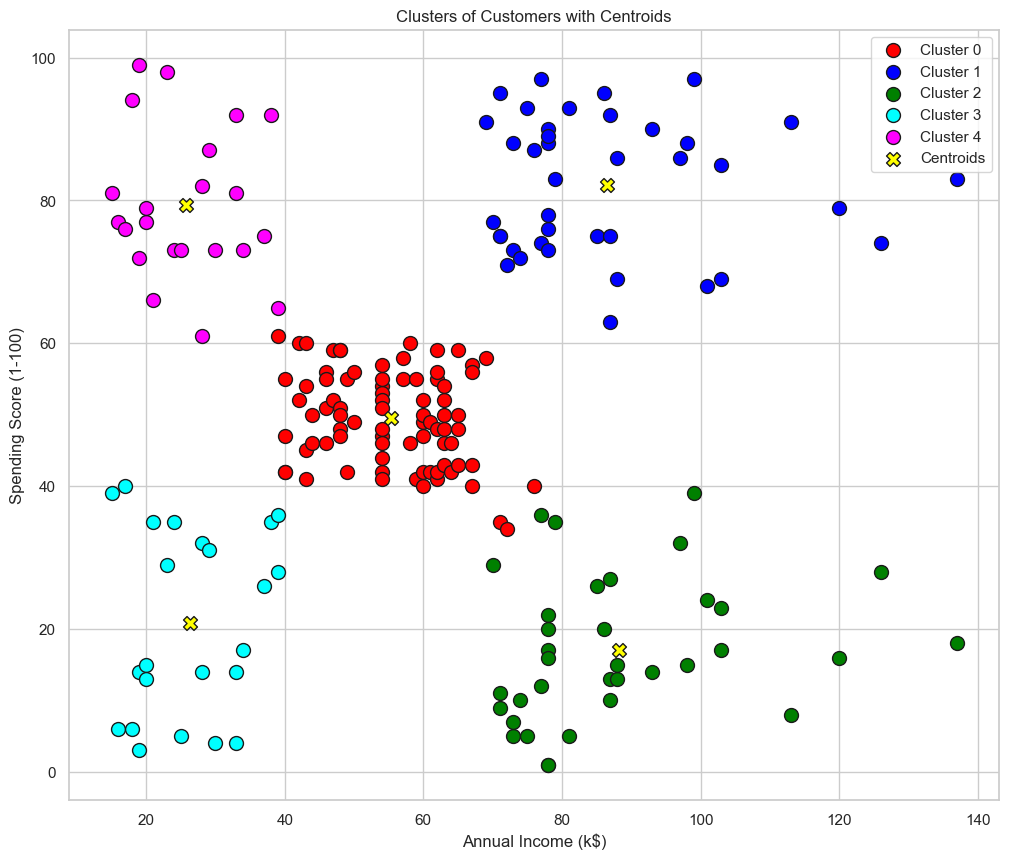

In [8]:

plt.figure(figsize=(12, 10))

colors = ["red", "blue", "green", "cyan", "magenta"]
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

for i in range(5):
    plt.scatter(
        X[Y == i, 0], X[Y == i, 1], s=100, c=colors[i], label=labels[i], edgecolor="k"
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0], 
    kmeans.cluster_centers_[:, 1], 
    s=100,
    c="yellow",
    label="Centroids",
    marker="X", 
    edgecolor="k",
)

plt.title("Clusters of Customers with Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()